El Conjunto de Datos de Indicadores de Salud de la Diabetes contiene estadísticas de atención médica e información de encuestas de estilo de vida sobre las personas en general junto con su diagnóstico de diabetes. Las 21 características consisten en algunos datos demográficos, resultados de pruebas de laboratorio y respuestas a las preguntas de la encuesta para cada paciente. La variable objetivo para la clasificación es si un paciente tiene diabetes, es pre-diabético o saludable.

#Área Temática

Salud y Medicina

#Tipo de Característica

Categóricas, Entero

# Instancias
253680

# Características
21

In [ ]:
import pandas as pd
#Cargar el dataset
url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
df = pd.read_csv(url)
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nDimensiones del dataset:")
print(df.shape)
print("\nInformación del dataset:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

Primeras 5 filas del dataset:
   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Incom

Estadísticas descriptivas:
                  ID  Diabetes_binary         HighBP       HighChol  \
count  253680.000000    253680.000000  253680.000000  253680.000000   
mean   126839.500000         0.139333       0.429001       0.424121   
std     73231.252481         0.346294       0.494934       0.494210   
min         0.000000         0.000000       0.000000       0.000000   
25%     63419.750000         0.000000       0.000000       0.000000   
50%    126839.500000         0.000000       0.000000       0.000000   
75%    190259.250000         0.000000       1.000000       1.000000   
max    253679.000000         1.000000       1.000000       1.000000   

           CholCheck            BMI         Smoker         Stroke  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.962670      28.382364       0.443169       0.040571   
std         0.189571       6.608694       0.496761       0.197294   
min         0.000000      12.000000       0.000000       

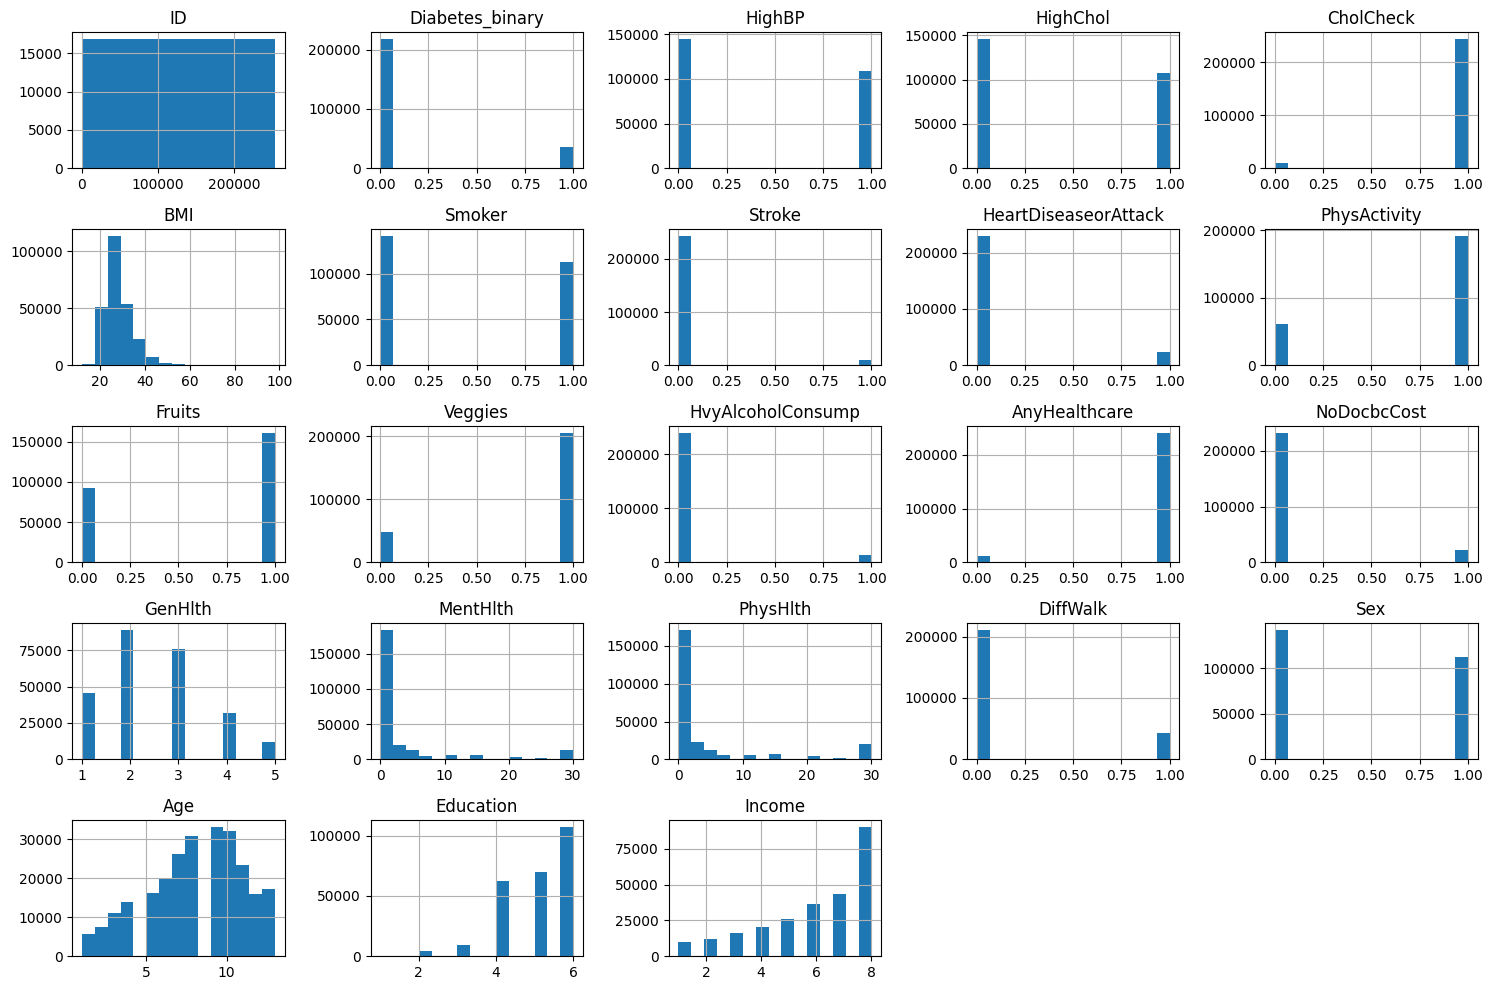

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Estadísticas descriptivas:")
print(df.describe())
# Histogramas para verla distribución de las variables numéricas
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

##Variable objetivo (Diabetes_binary)

Solo el 13.93% de los registros tienen diabetes (media de 0.139).
## Factores de riesgo clave

Hipertensión (HighBP): 42.9% de los pacientes la tienen.

Colesterol alto (HighChol): 42.4% de los pacientes.

Actividad física (PhysActivity): El 75.6% hace ejercicio regularmente.

Índice de Masa Corporal (BMI): Media de 28.38, indicando sobrepeso.
##Otros aspectos de salud

HeartDiseaseorAttack: 9.4% ha sufrido enfermedades cardíacas.

GenHlth (salud general autocalificada): Media de 2.51, donde 5 es peor salud.

MentHlth y PhysHlth (días de malestar mental y físico en los últimos 30 días) tienen valores altos en el 75% superior.

Dificultad para caminar (DiffWalk): 16.8% la presentan.

##Variables demográficas

Sexo (Sex): 44% son hombres y 56% mujeres.

Edad (Age): Varía entre 1 y 13 (CATEGORIAS)

Educación (Education): La mayoría tiene entre 4 y 6 (por clases).

Ingreso (Income): Media de 6.05, en una escala de 1 a 8 igual por clases.

## Categorías de Edad
| Código | Rango de edad  |
|--------|--------------|
| 1      | 18-24 años   |
| 2      | 25-29 años   |
| 3      | 30-34 años   |
| 4      | 35-39 años   |
| 5      | 40-44 años   |
| 6      | 45-49 años   |
| 7      | 50-54 años   |
| 8      | 55-59 años   |
| 9      | 60-64 años   |
| 10     | 65-69 años   |
| 11     | 70-74 años   |
| 12     | 75-79 años   |
| 13     | 80 años o más |


## Escala de Ingresos (INCOME)

La variable `INCOME` representa los ingresos en diferentes rangos. A

*   Elemento de la lista
*   Elemento de la lista

continuación, se muestra el significado de cada código:

| Código | Rango de ingresos          |
|--------|----------------------------|
| 1      | Menos de 10,000           |
| 2      | 10,000 - 15,000          |
| 3      | 15,000 - 20,000          |
| 4      | 20,000 - 25,000          |
| 5      | 25,000 - 35,000          |
| 6      | 35,000 - 50,000          |
| 7      | 50,000 - 75,000          |
| 8      | 75,000 o más              |

Esta escala permite clasificar a los individuos según su nivel de ingresos y analizar su relación con otras variables, como el estado de salud o el acceso a servicios médicos.

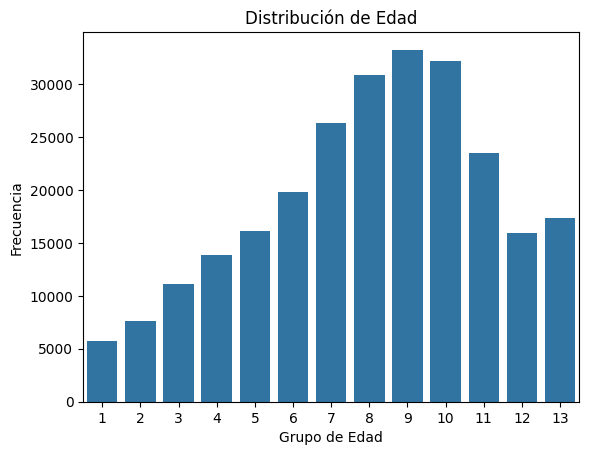

In [ ]:
sns.countplot(data=df, x='Age')
plt.title('Distribución de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.show()

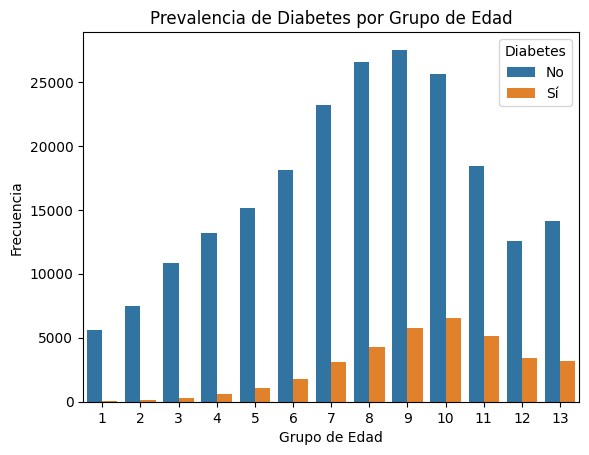

In [ ]:
sns.countplot(data=df, x='Age', hue='Diabetes_binary')
plt.title('Prevalencia de Diabetes por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Diabetes', labels=['No', 'Sí'])
plt.show()

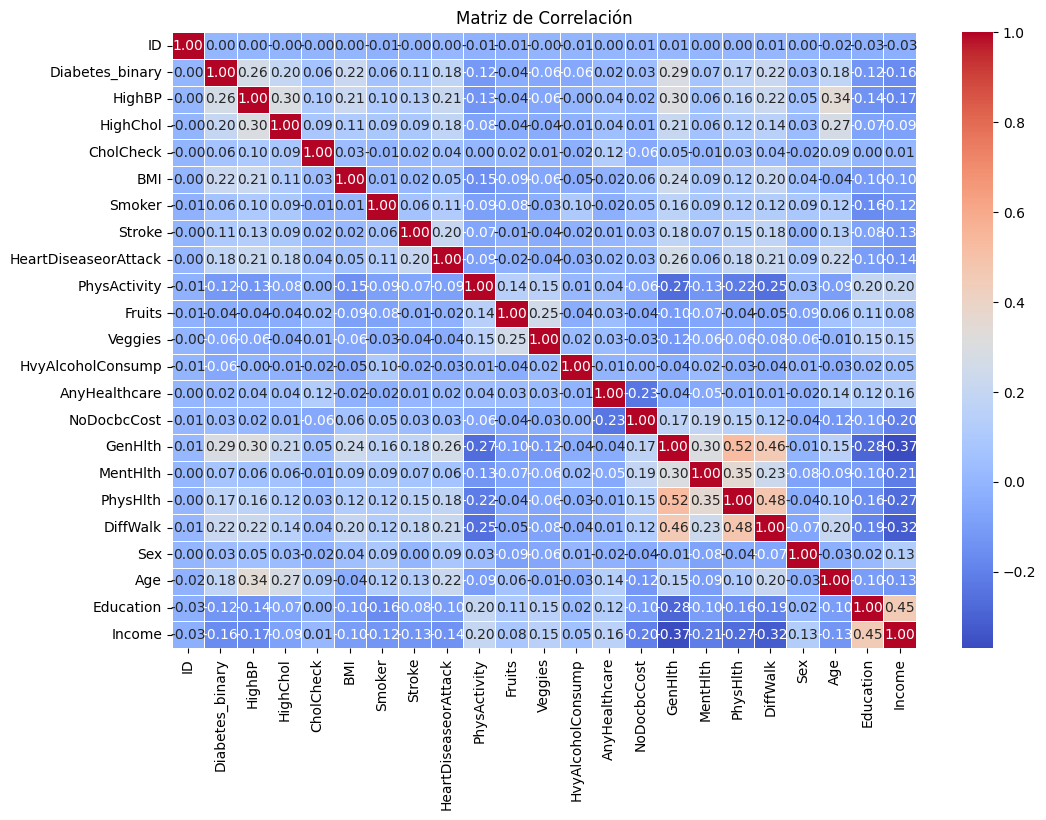

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# correlaciones más altas
corr_abs = corr.abs()
altas_corr = corr_abs.unstack().sort_values(ascending=False)
altas_corr = altas_corr[altas_corr < 1]
print(altas_corr.head(10))

GenHlth    PhysHlth     0.524364
PhysHlth   GenHlth      0.524364
DiffWalk   PhysHlth     0.478417
PhysHlth   DiffWalk     0.478417
DiffWalk   GenHlth      0.456920
GenHlth    DiffWalk     0.456920
Income     Education    0.449106
Education  Income       0.449106
GenHlth    Income       0.370014
Income     GenHlth      0.370014
dtype: float64


In [ ]:
categoricas_col = ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies']
#Distribucion de variables categoricas
for column in categoricas_col:
    print(f"Distribución de {column}:")
    print(df[column].value_counts(normalize=True))
    print("\n")

Distribución de Smoker:
Smoker
0    0.556831
1    0.443169
Name: proportion, dtype: float64


Distribución de Stroke:
Stroke
0    0.959429
1    0.040571
Name: proportion, dtype: float64


Distribución de HeartDiseaseorAttack:
HeartDiseaseorAttack
0    0.905814
1    0.094186
Name: proportion, dtype: float64


Distribución de PhysActivity:
PhysActivity
1    0.756544
0    0.243456
Name: proportion, dtype: float64


Distribución de Fruits:
Fruits
1    0.634256
0    0.365744
Name: proportion, dtype: float64


Distribución de Veggies:
Veggies
1    0.81142
0    0.18858
Name: proportion, dtype: float64




In [ ]:
# Correlación con la variable objetivo
corr_diabetes = corr['Diabetes_binary'].sort_values(ascending=False)
print(corr_diabetes)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
ID                      0.004268
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


##Análisis
Las variables como BMI, HighBP, HighChol, GenHlth y DiffWalk tienen una correlación positiva moderada con Diabetes_binary, lo que sugiere que las personas con ciertos problemas de salud (como hipertensión, colesterol alto, problemas de movilidad, etc.) tienen mayor probabilidad de tener diabetes.
Las variables como Fruits, Veggies, PhysActivity, Education e Income tienen una correlación negativa, lo que sugiere que un mayor nivel de actividad física, una mayor educación, un mayor consumo de frutas y vegetales, y un mayor nivel de ingresos están asociados con una menor probabilidad de diabetes.

##CLUSTERIZACION

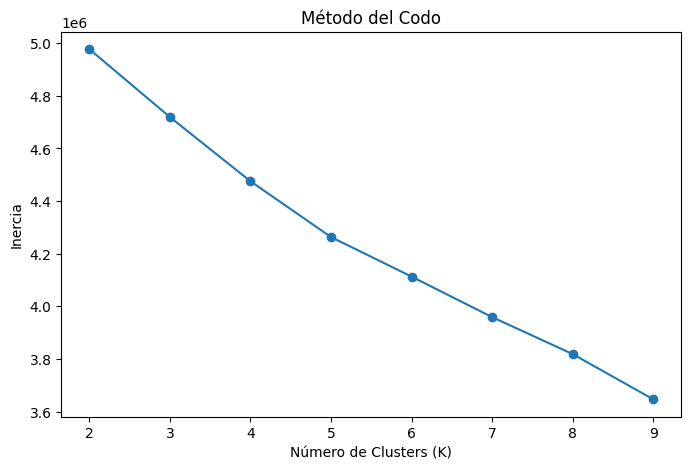

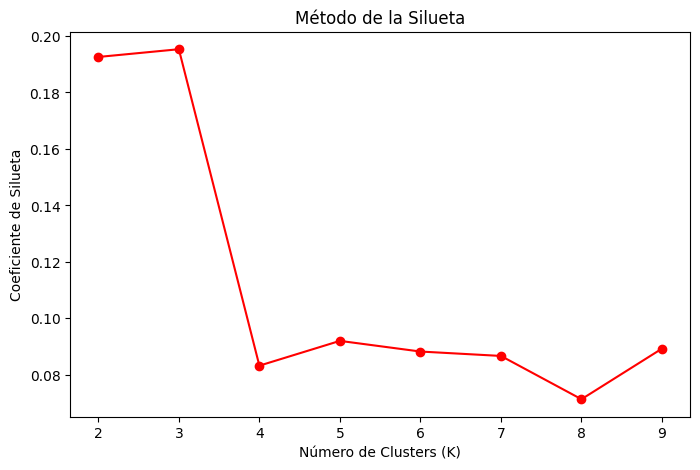

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
df = pd.read_csv('https://archive.ics.uci.edu/static/public/891/data.csv')
X = df.drop(columns=['Diabetes_binary'])  # columna objetivo eliminar
# ESTANDARIZAR LOS DATOS
escalamiento = StandardScaler()
X_escalados = escalamiento.fit_transform(X)

# Método del codo
inercia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_escalados)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Coeficiente de silueta para diferentes valores de K
puntaje_silueta = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_escalados)
    score = silhouette_score(X_escalados, labels)
    puntaje_silueta.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, puntaje_silueta, marker='o', color='red')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de la Silueta')
plt.show()




Distribución de clusters:
Cluster
0     12369
1    177562
2     63749
Name: count, dtype: int64

Estadísticas descriptivas por cluster:
                    ID  Diabetes_binary    HighBP  HighChol  CholCheck  \
Cluster                                                                  
0        126810.476110         0.112620  0.342792  0.329776   0.863853   
1        126035.577252         0.079657  0.325819  0.353606   0.961647   
2        129084.321527         0.310734  0.733125  0.638834   0.984690   

               BMI    Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Cluster                                                                      
0        28.897486  0.493815  0.030237              0.067265      0.691244   
1        27.438827  0.380937  0.009602              0.031933      0.854980   
2        30.910477  0.606676  0.128833              0.272804      0.495035   

         ...  AnyHealthcare  NoDocbcCost   GenHlth  MentHlth   PhysHlth  \
Cluster  ...              

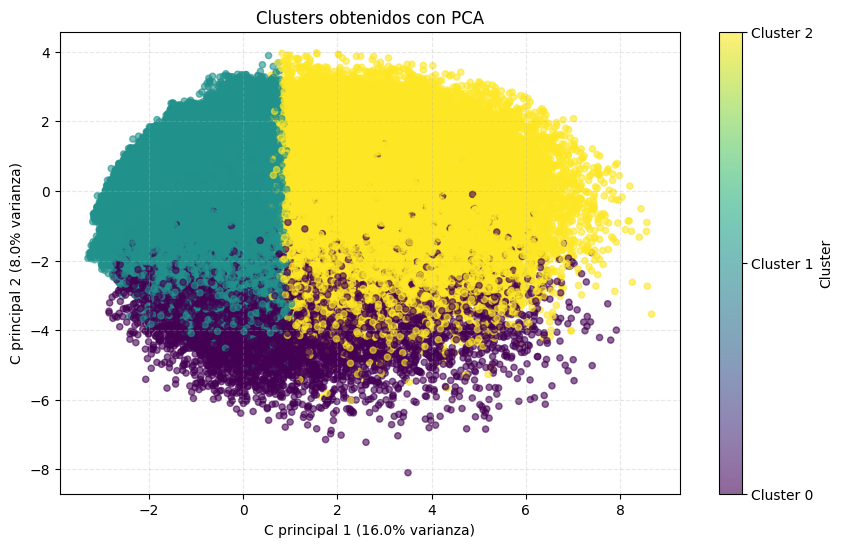

In [ ]:

from sklearn.decomposition import PCA
#K-Means con el óptimo de clusters basado en el coeficiente de silueta
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=40, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_escalados)  # añadimos  esta columna al dataframe
print("\nDistribución de clusters:")
print(df['Cluster'].value_counts().sort_index())
#descripcion por cluster
print("\nEstadísticas descriptivas por cluster:")
print(df.groupby('Cluster').mean())
#reducimos la dimensionalidad usando PCA ( usaremos 2 componentes principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalados)
#Visual de Clusters  PCA
plt.figure(figsize=(10, 6))
dispersion = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], alpha=0.6, s=20)
plt.xlabel(f'C principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'C principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Clusters obtenidos con PCA')
cbar = plt.colorbar(dispersion)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
cbar.set_label('Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [ ]:
#Relación clusters-diabetes
print("\nPrevalencia de diabetes por cluster:")
print(df.groupby('Cluster')['Diabetes_binary'].mean().sort_values(ascending=False))


Prevalencia de diabetes por cluster:
Cluster
2    0.310734
0    0.112620
1    0.079657
Name: Diabetes_binary, dtype: float64


In [ ]:
# Comparamos características clave por cluster
clusters_comparasion = df.groupby('Cluster')[['Age', 'BMI', 'HighBP', 'HighChol', 'PhysActivity',
                                            'HeartDiseaseorAttack', 'Stroke', 'Smoker',
                                            'Diabetes_binary']].mean()
# diabetes y la edad promedio entre clusters
prevalencia_edad = df.groupby('Cluster')[['Diabetes_binary', 'Age']].mean()
#distribución de género en los clusters
sexo_comparasion = df.groupby('Cluster')['Sex'].value_counts().unstack(fill_value=0)
#nivel de educación promedio por cluster
educacion_comparasion = df.groupby('Cluster')['Education'].mean()
#actividad física y fumar entre los clusters
actividad_fumar_comparasion = df.groupby('Cluster')[['PhysActivity', 'Smoker']].mean()
#salud mental y la salud general
salud_comparasion = df.groupby('Cluster')[['MentHlth', 'GenHlth']].mean()
# acceso a la atención médica
atencion_medica_comparasion = df.groupby('Cluster')[['AnyHealthcare', 'NoDocbcCost']].mean()
#tabla para comparar
comparasion_final = pd.concat([
    clusters_comparasion,
    prevalencia_edad[['Diabetes_binary', 'Age']],
    sexo_comparasion,
    educacion_comparasion,
    actividad_fumar_comparasion,
    salud_comparasion,
    atencion_medica_comparasion
], axis=1)
print(comparasion_final)

              Age        BMI    HighBP  HighChol  PhysActivity  \
Cluster                                                          
0        6.158056  28.897486  0.342792  0.329776      0.691244   
1        7.636780  27.438827  0.325819  0.353606      0.854980   
2        9.496886  30.910477  0.733125  0.638834      0.495035   

         HeartDiseaseorAttack    Stroke    Smoker  Diabetes_binary  \
Cluster                                                              
0                    0.067265  0.030237  0.493815         0.112620   
1                    0.031933  0.009602  0.380937         0.079657   
2                    0.272804  0.128833  0.606676         0.310734   

         Diabetes_binary       Age      0      1  Education  PhysActivity  \
Cluster                                                                     
0               0.112620  6.158056   6389   5980   4.520414      0.691244   
1               0.079657  7.636780  96910  80652   5.293965      0.854980   
2         

<Figure size 1200x800 with 0 Axes>

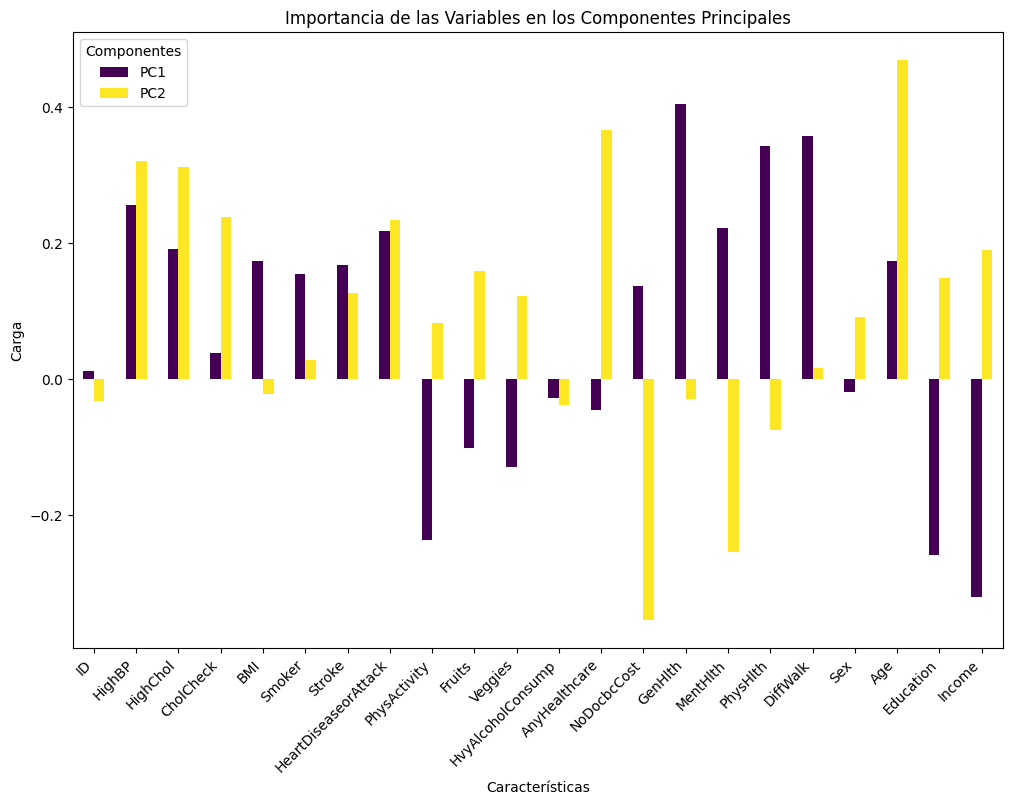


Cargas de los Componentes Principales:
                           PC1       PC2
ID                    0.011808 -0.032910
HighBP                0.256375  0.320952
HighChol              0.191285  0.312982
CholCheck             0.038500  0.239414
BMI                   0.173601 -0.021554
Smoker                0.154811  0.027791
Stroke                0.168242  0.126400
HeartDiseaseorAttack  0.218654  0.234926
PhysActivity         -0.237277  0.083244
Fruits               -0.101884  0.159704
Veggies              -0.129682  0.122753
HvyAlcoholConsump    -0.027310 -0.037627
AnyHealthcare        -0.044746  0.366815
NoDocbcCost           0.136970 -0.355082
GenHlth               0.405388 -0.029305
MentHlth              0.223123 -0.254297
PhysHlth              0.343697 -0.075465
DiffWalk              0.358353  0.016093
Sex                  -0.018597  0.090772
Age                   0.174186  0.469565
Education            -0.258495  0.148873
Income               -0.320407  0.190518


In [ ]:
cargas = pca.components_
# dataframe con importancia
nombres_var = X.columns
cargas_df = pd.DataFrame(cargas.T, columns=[f'PC{i+1}' for i in range(cargas.shape[0])], index=nombres_var)
#cargas de las variables de los dos  componentes
plt.figure(figsize=(12, 8))
cargas_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Importancia de las Variables en los Componentes Principales')
plt.ylabel('Carga')
plt.xlabel('Características')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Componentes', loc='upper left')
plt.show()
print("\nCargas de los Componentes Principales:")
print(cargas_df)


##METODOS DE CLASIFICACIÓN

#RandomForestClassifier

Precisión del modelo: 0.8594


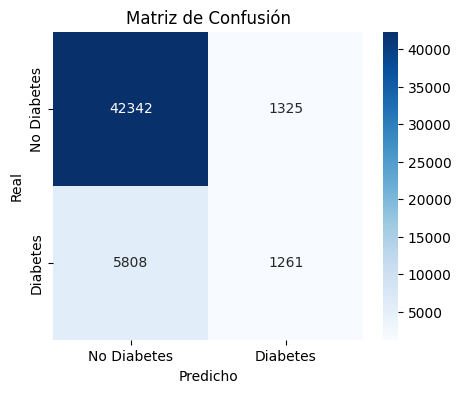


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
df1 = pd.read_csv('https://archive.ics.uci.edu/static/public/891/data.csv')

# separamos caracteristicas (X) y objetivo (y)
X = df1.drop(columns=['Diabetes_binary', 'ID'])
y = df1['Diabetes_binary']
#conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#entrenar Random Forest e inicializamos
randomf = RandomForestClassifier(n_estimators=100, random_state=42)
randomf.fit(X_train, y_train)
# predicciones
y_prediccion = randomf.predict(X_test)
#evaluamos el modelo
accuracy = accuracy_score(y_test, y_prediccion)
print(f'Precisión del modelo: {accuracy:.4f}')
#matriz de confusión
conf_matrix = confusion_matrix(y_test, y_prediccion)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
print("\nReporte de clasificación:")
print(classification_report(y_test, y_prediccion))


# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
#entrenamiento Del modelo
xgb_model.fit(X_train, y_train)
#predicciones
y_pred_xgb = xgb_model.predict(X_test)
#evaluamos el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
clasifi_report_xgb = classification_report(y_test, y_pred_xgb)
# resultados
print(f"Precisión del modelo XGBoost: {accuracy_xgb:.4f}")
print("Matriz de confusión:")
print(conf_matrix_xgb)
print("Reporte de clasificación:")
print(clasifi_report_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:43:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisión del modelo XGBoost: 0.8640
Matriz de confusión:
[[42625  1042]
 [ 5859  1210]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.17      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



#LGBM CLASSIFIER

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df1.drop('Diabetes_binary', axis=1)
y = df1['Diabetes_binary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
# Predeccion en el conjunto de prueba
y_pred_lgbm = lgbm_model.predict(X_test)
#evaluamos el modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)
#resultados
print(f"Precisión del modelo LGBM: {accuracy_lgbm:.4f}")
print("Matriz de confusión:")
print(conf_matrix_lgbm)
print("Reporte de clasificación:")
print(class_report_lgbm)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 473
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139689 -> initscore=-1.817877
[LightGBM] [Info] Start training from score -1.817877


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Precisión del modelo LGBM: 0.8682
Matriz de confusión:
[[42896   843]
 [ 5843  1154]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.58      0.16      0.26      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.57      0.59     50736
weighted avg       0.84      0.87      0.84     50736



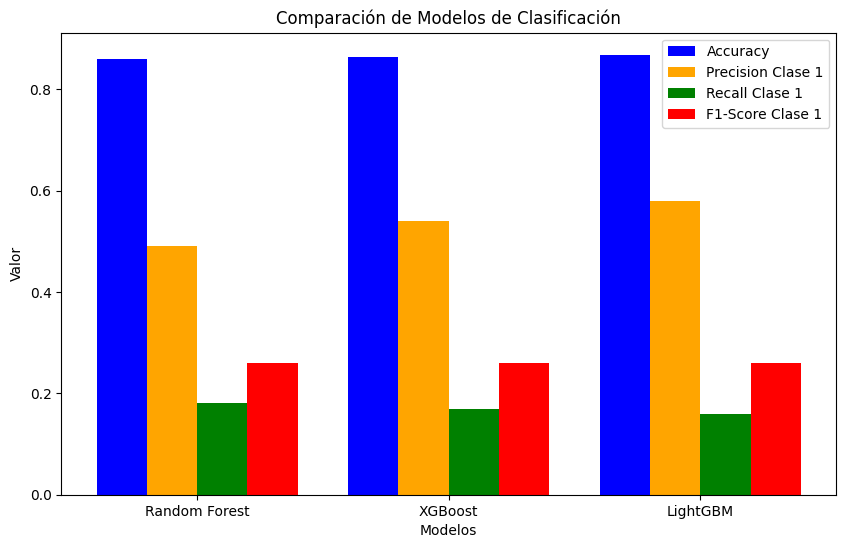

In [ ]:
#datos de los modelos
modelos = ["Random Forest", "XGBoost", "LightGBM"]
accuracy = [0.8594, 0.8640, 0.8682]
precision_clase1 = [0.49, 0.54, 0.58]
recall_clase1 = [0.18, 0.17, 0.16]
f1_score_clase1 = [0.26, 0.26, 0.26]
x = np.arange(len(modelos))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='blue')
ax.bar(x - 0.5*width, precision_clase1, width, label='Precision Clase 1', color='orange')
ax.bar(x + 0.5*width, recall_clase1, width, label='Recall Clase 1', color='green')
ax.bar(x + 1.5*width, f1_score_clase1, width, label='F1-Score Clase 1', color='red')
ax.set_xlabel("Modelos")
ax.set_ylabel("Valor")
ax.set_title("Comparación de Modelos de Clasificación")
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()
plt.show()

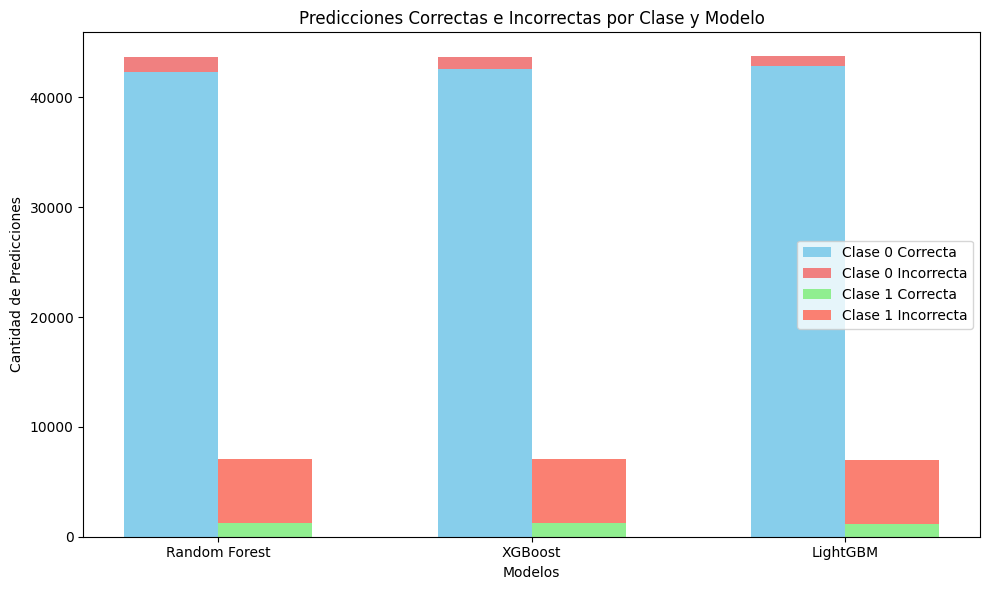

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Resultados de la matriz de confusión para cada modelo
# [TN, FP]
# [FN, TP]
tn_rf, fp_rf = 42342, 1325
fn_rf, tp_rf = 5808, 1261
# XGBoost
tn_xgb, fp_xgb = 42625, 1042
fn_xgb, tp_xgb = 5859, 1210
# LGBM
tn_lgbm, fp_lgbm = 42896, 843
fn_lgbm, tp_lgbm = 5843, 1154
# Modelos
models = ["Random Forest", "XGBoost", "LightGBM"]
#predicciones correctas para cada clase
correcta_class_0_rf = tn_rf
correcta_class_1_rf = tp_rf
correcta_class_0_xgb = tn_xgb
correcta_class_1_xgb = tp_xgb
correcta_class_0_lgbm = tn_lgbm
correcta_class_1_lgbm = tp_lgbm
#predicciones incorrectas para cada clase
incorrecta_class_0_rf = fp_rf
incorrecta_class_1_rf = fn_rf
incorrecta_class_0_xgb = fp_xgb
incorrecta_class_1_xgb = fn_xgb
incorrecta_class_0_lgbm = fp_lgbm
incorrecta_class_1_lgbm = fn_lgbm
#datos de  clases correctas e incorrectas por modelo
correct_class_0 = [correcta_class_0_rf, correcta_class_0_xgb, correcta_class_0_lgbm]
incorrect_class_0 = [incorrecta_class_0_rf, incorrecta_class_0_xgb, incorrecta_class_0_lgbm]
correct_class_1 = [correcta_class_1_rf, correcta_class_1_xgb, correcta_class_1_lgbm]
incorrect_class_1 = [incorrecta_class_1_rf, incorrecta_class_1_xgb, incorrecta_class_1_lgbm]
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.3
x = np.arange(len(models))
#predicciones correctas e incorrectas
ax.bar(x - width / 2, correct_class_0, width, label='Clase 0 Correcta', color='skyblue')
ax.bar(x - width / 2, incorrect_class_0, width, bottom=correct_class_0, label='Clase 0 Incorrecta', color='lightcoral')
ax.bar(x + width / 2, correct_class_1, width, label='Clase 1 Correcta', color='lightgreen')
ax.bar(x + width / 2, incorrect_class_1, width, bottom=correct_class_1, label='Clase 1 Incorrecta', color='salmon')
ax.set_xlabel('Modelos')
ax.set_ylabel('Cantidad de Predicciones')
ax.set_title('Predicciones Correctas e Incorrectas por Clase y Modelo')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()



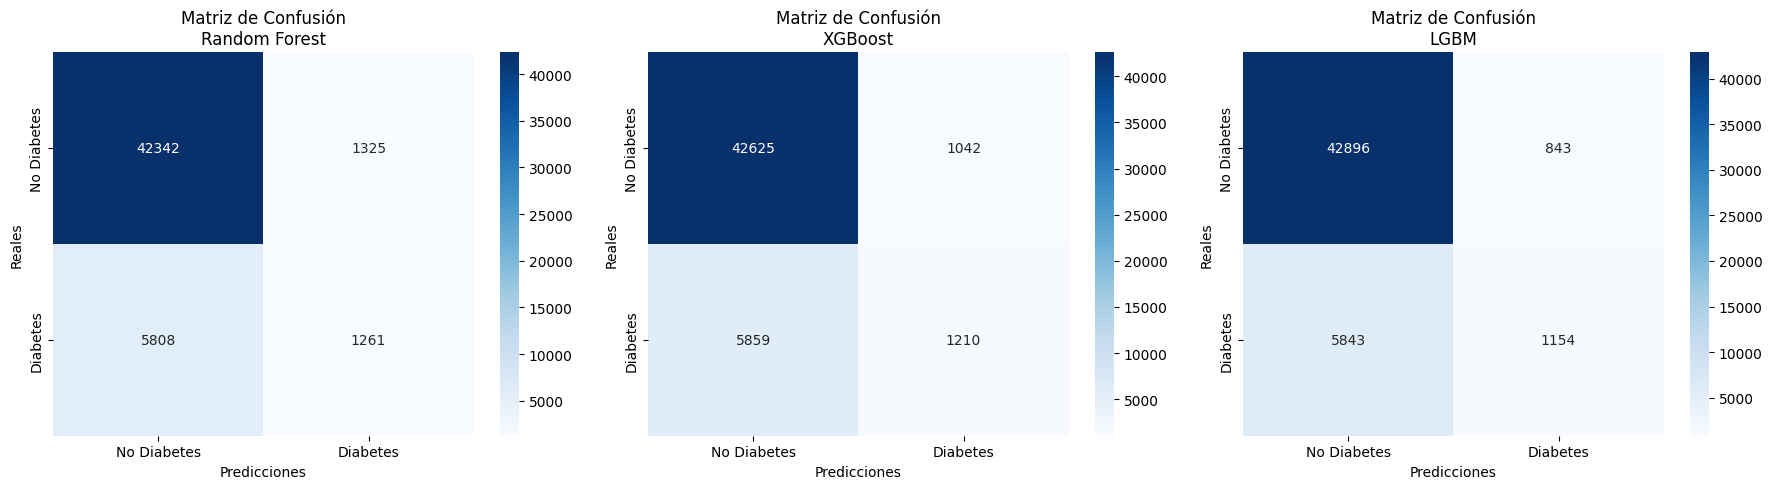

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrices = {
    'Random Forest': np.array([[42342, 1325], [5808, 1261]]),
    'XGBoost': np.array([[42625, 1042], [5859, 1210]]),
    'LGBM': np.array([[42896, 843], [5843, 1154]])
}
plt.figure(figsize=(18, 5))
for i, (model_name, matrix) in enumerate(conf_matrices.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Matriz de Confusión\n{model_name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Reales')
plt.tight_layout()
plt.show()

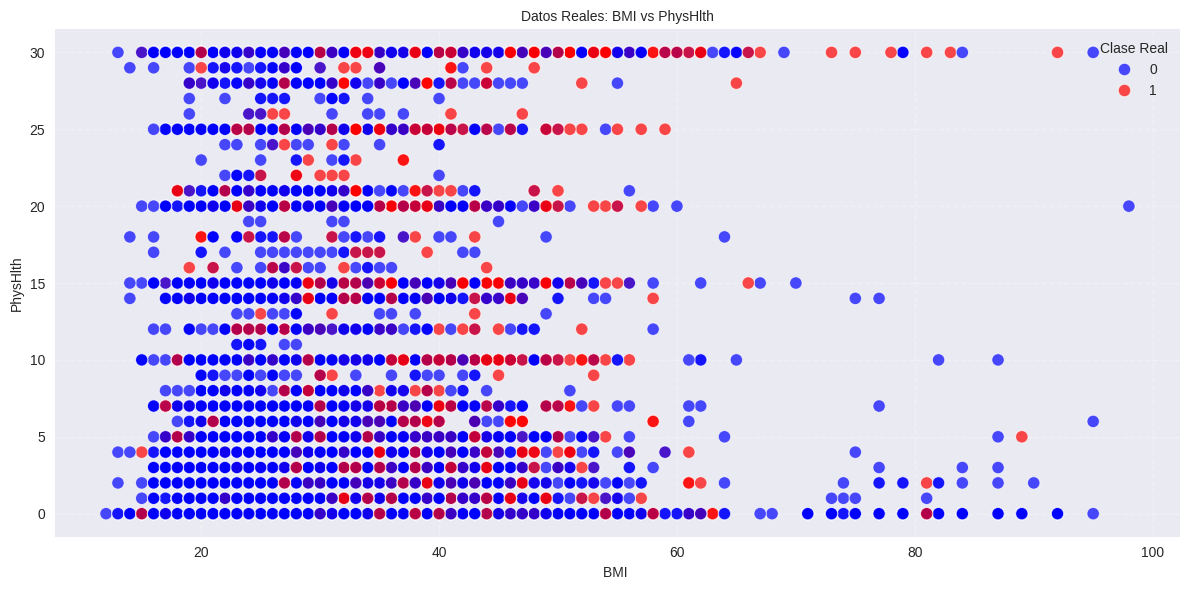

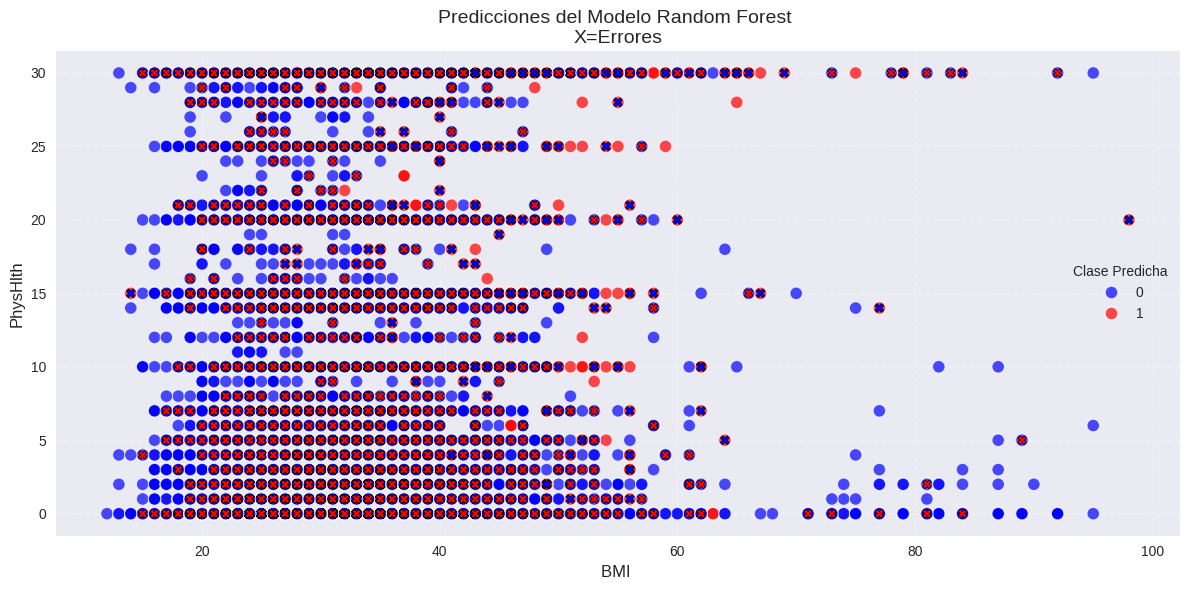

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
df2 = pd.read_csv(url)[['BMI', 'PhysHlth', 'Diabetes_binary']].dropna()
X_train, X_test, y_train, y_test = train_test_split(
    df2[['BMI', 'PhysHlth']],
    df2['Diabetes_binary'],
    test_size=0.2,
    random_state=42
)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
try:
    plt.style.use('seaborn-v0_8')  # Estilo alternativo compatible
except:
    sns.set_theme(style="whitegrid")  # Fallback a tema de Seaborn

palette = {0: 'blue', 1: 'red'}

#grafico de  Datos reales
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=X_test.assign(Diabetes=y_test),
    x='BMI',
    y='PhysHlth',
    hue='Diabetes',
    palette=palette,
    alpha=0.7,
    s=80
)
plt.title('Datos Reales: BMI vs PhysHlth', fontsize=10)
plt.xlabel('BMI ', fontsize=10)
plt.ylabel('PhysHlth', fontsize=10)
plt.legend(title='Clase Real')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#grafico 2: Predicciones
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=X_test.assign(Diabetes=y_pred),
    x='BMI',
    y='PhysHlth',
    hue='Diabetes',
    palette=palette,
    alpha=0.7,
    s=80
)

#marcamos errores
errors = y_test != y_pred
error_df = X_test[errors].assign(Diabetes=y_test[errors])
if not error_df.empty:
    sns.scatterplot(
        data=error_df,
        x='BMI',
        y='PhysHlth',
        hue='Diabetes',
        palette=palette,
        marker='X',
        s=40,
        linewidth=.5,
        edgecolor='black',
        legend=False
    )

plt.title('Predicciones del Modelo Random Forest \nX=Errores', fontsize=14)
plt.xlabel('BMI ', fontsize=12)
plt.ylabel('PhysHlth', fontsize=12)
plt.legend(title='Clase Predicha')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()